In [1]:
import findspark 
findspark.init()
import pyspark
findspark.find()


'C:\\spark\\spark-3.2.0-bin-hadoop3.2'

In [2]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SparkSession

conf = pyspark.SparkConf().setAppName('MyApp-17').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession(sc)

spark


In [ ]:
import socket
import sys
serverName = '192.168.1.8'
serverPort = 49675

#in this loop, sockets open and close for each request the client makes
#while True:
 #create socket object for client
clientSocket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
clientSocket.connect((serverName,serverPort))
print('Connected to server.')
fileName = "C:\\Users\\dell\\Desktop\\Data_logs.csv"
clientSocket.send(fileName)
    #if sentence == 'GET':
f = open(fileName, "wb")
print('Receiving file..')
l = clientSocket.recv(1024)
while (l):
    f.write(l)
    l = clientSocket.recv(1024)
    f.close()
print('Done receiving file')
clientSocket.close()

In [3]:

file_data  = spark.read.csv(r'D:\Code_Place\Data-Science\Scikit Learn\dataset_2\cnn_rnn\rba-dataset_rnn.csv', inferSchema=True,header=True)
file_data.printSchema()


root
 |-- index: integer (nullable = true)
 |-- Login Timestamp: string (nullable = true)
 |-- User ID: double (nullable = true)
 |-- Round-Trip Time [ms]: integer (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- ASN: integer (nullable = true)
 |-- User Agent String: string (nullable = true)
 |-- Browser Name and Version: string (nullable = true)
 |-- OS Name and Version: string (nullable = true)
 |-- Device Type: string (nullable = true)
 |-- Login Successful: boolean (nullable = true)
 |-- Is Attack IP: boolean (nullable = true)
 |-- Is Account Takeover: boolean (nullable = true)



In [4]:
file_data.count()

566921


In [5]:
file_data.head(5)

[Row(index=0, Login Timestamp='43:30.8', User ID=-4.32448e+18, Round-Trip Time [ms]=None, IP Address='10.0.65.171', Country='NO', Region='-', City='-', ASN=29695, User Agent String='Mozilla/5.0  (iPhone; CPU iPhone OS 13_4 like Mac OS X) Gecko/20150101 Firefox/20.0.0.1618 (Chrome variation/248113', Browser Name and Version='Firefox 20.0.0.1618', OS Name and Version='iOS 13.4', Device Type='mobile', Login Successful=False, Is Attack IP=False, Is Account Takeover=False),
 Row(index=1, Login Timestamp='43:43.5', User ID=-4.32448e+18, Round-Trip Time [ms]=None, IP Address='194.87.207.6', Country='AU', Region='-', City='-', ASN=60117, User Agent String='Mozilla/5.0  (Linux; Android 4.1; Galaxy Nexus Build/JRN84D) AppleWebKit/537.36 (KHTML, like Gecko Chrome/46.0.2490.76 Mobile Safari/537.36 Browser', Browser Name and Version='Chrome Mobile 46.0.2490', OS Name and Version='Android 4.1', Device Type='mobile', Login Successful=False, Is Attack IP=False, Is Account Takeover=False),
 Row(index=2

In [7]:
from pyspark.sql.functions import col, skewness, kurtosis
trans_data.select(skewness('_c0'),kurtosis('_c0')).show()

In [5]:
file_data.describe().show()

+-------+-----------------+---------------+--------------------+--------------------+-----------+-------+-----------+--------+-----------------+--------------------+------------------------+-------------------+-----------+
|summary|            index|Login Timestamp|             User ID|Round-Trip Time [ms]| IP Address|Country|     Region|    City|              ASN|   User Agent String|Browser Name and Version|OS Name and Version|Device Type|
+-------+-----------------+---------------+--------------------+--------------------+-----------+-------+-----------+--------+-----------------+--------------------+------------------------+-------------------+-----------+
|  count|              299|            299|                 299|                  10|        299|    299|        299|     299|              299|                 299|                     299|                299|        299|
|   mean|            149.0|           null|-1.38340419598662...|               538.2|       null|   null|   

In [5]:
import numpy as np
import pandas as pd
df_main = file_data.toPandas()
df_main.head()

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,43:30.8,-4.320000e+18,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,43:43.5,-4.320000e+18,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,43:55.9,-3.280000e+18,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,43:56.2,-4.320000e+18,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,43:59.4,-4.620000e+18,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False


In [6]:
df_main.replace(np.nan,0)


,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,43:30.8,-4.320000e+18,0.0,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,43:43.5,-4.320000e+18,0.0,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,43:55.9,-3.280000e+18,0.0,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,43:56.2,-4.320000e+18,0.0,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,43:59.4,-4.620000e+18,0.0,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,1784,48:05.4,-4.320000e+18,0.0,84.48.83.61,NO,-,-,15659,Mozilla/5.0 (X11; CrOS x86_64 13505.73.0) App...,Chrome 72.0.3626,Chrome OS 13505.73.0,desktop,False,False,False
1785,1785,48:07.0,-4.320000e+18,0.0,77.106.186.39,NO,Innlandet,Ringebu,29492,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 69.0.3497.17.19,Mac OS X 10.14.6,desktop,False,False,False
1786,1786,48:07.2,-4.320000e+18,0.0,81.167.160.25,NO,Viken,Moss,29695,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6...,Chrome 69.0.3497.17.19,Mac OS X 10.14.6,desktop,False,False,False
1787,1787,48:07.3,-4.110000e+18,0.0,89.162.1.49,NO,Nordland,BodÃ¸,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 lik...,Chrome Mobile WebView 85.0.4183,iOS 11.2.6,mobile,True,False,False


In [7]:
df = df_main.copy()
df.dtypes

index                         int32
Login Timestamp              object
User ID                     float64
Round-Trip Time [ms]        float64
IP Address                   object
Country                      object
Region                       object
City                         object
ASN                           int32
User Agent String            object
Browser Name and Version     object
OS Name and Version          object
Device Type                  object
Login Successful               bool
Is Attack IP                   bool
Is Account Takeover            bool
dtype: object

In [26]:
df.columns

Index(['index', 'Login Timestamp', 'User ID', 'Round-Trip Time [ms]',
       'IP Address', 'Country', 'Region', 'City', 'ASN', 'User Agent String',
       'Browser Name and Version', 'OS Name and Version', 'Device Type',
       'Login Successful', 'Is Attack IP', 'Is Account Takeover'],
      dtype='object')

In [8]:
df = df[['Login Timestamp', 'User ID', 'Round-Trip Time [ms]',
       'IP Address', 'Country', 'Region', 'City', 'ASN', 'User Agent String',
       'Browser Name and Version', 'OS Name and Version', 'Device Type',
       'Login Successful', 'Is Attack IP', 'Is Account Takeover']]

df.dtypes

df.rename(columns = {'Login Timestamp':'Login_Timestamp',
                     'User ID':'User_ID',
                     'Round-Trip Time [ms]':'RTT',
                     'IP Address':'IP',
                     'User Agent String':'UserAgentString',
                     'Browser Name and Version':'BNV',
                     'Device Type':'DT',
                     'Login Successful':'LS',
                     'OS Name and Version':'ONV',
                     'Is Attack IP':'IAI',
                     'Is Account Takeover': 'IAT'
                     }, inplace = True)
df.dtypes

Login_Timestamp     object
User_ID            float64
RTT                float64
IP                  object
Country             object
Region              object
City                object
ASN                  int32
UserAgentString     object
BNV                 object
ONV                 object
DT                  object
LS                    bool
IAI                   bool
IAT                   bool
dtype: object

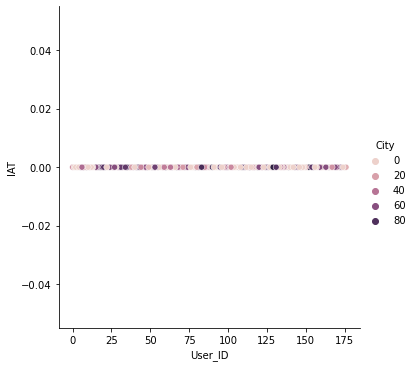

In [20]:
sns.relplot(data=df, x="User_ID", y="IAT", hue="City")

In [9]:
df['Region'] = pd.Categorical(df['Region'])
df['Region'] = df.Region.cat.codes
df['City'] = pd.Categorical(df['City'])
df['City'] = df.City.cat.codes
df['UserAgentString'] = pd.Categorical(df['UserAgentString'])
df['UserAgentString'] = df.UserAgentString.cat.codes
df['BNV'] = pd.Categorical(df['BNV'])
df['BNV'] = df.BNV.cat.codes
df['ONV'] = pd.Categorical(df['ONV'])
df['ONV'] = df.ONV.cat.codes
df['DT'] = pd.Categorical(df['DT'])
df['DT'] = df.DT.cat.codes
df['IAT'] = pd.Categorical(df['IAT'])
df['IAT'] = df.IAT.cat.codes

In [10]:
df['Login_Timestamp'] = pd.Categorical(df['Login_Timestamp'])
df['Login_Timestamp'] = df.Login_Timestamp.cat.codes
df['User_ID'] = pd.Categorical(df['User_ID'])
df['User_ID'] = df.User_ID.cat.codes
df['RTT'] = pd.Categorical(df['RTT'])
df['RTT'] = df.RTT.cat.codes
df['IP'] = pd.Categorical(df['IP'])
df['IP'] = df.IP.cat.codes


In [11]:
df['LS'] = pd.Categorical(df['LS'])
df['LS'] = df.LS.cat.codes
df['IAI'] = pd.Categorical(df['IAI'])
df['IAI'] = df.IAI.cat.codes
df['Country'] = pd.Categorical(df['Country'])
df['Country'] = df.Country.cat.codes



In [12]:
df.head()

,Login_Timestamp,User_ID,RTT,IP,Country,Region,City,ASN,UserAgentString,BNV,ONV,DT,LS,IAI,IAT
0,1,47,-1,32,15,0,0,29695,103,50,30,1,0,0,0
1,3,47,-1,123,1,0,0,60117,7,29,3,1,0,0,0
2,4,58,-1,211,15,34,86,29695,65,5,35,1,1,0,0
3,5,47,-1,98,20,0,0,393398,15,46,3,1,0,0,0
4,6,46,-1,0,20,36,3,398986,29,46,2,1,0,1,0


In [13]:
# df['LS'] = pd.Categorical(df['LS']).apply(int)
df.dtypes

Login_Timestamp    int16
User_ID            int16
RTT                 int8
IP                 int16
Country             int8
Region              int8
City                int8
ASN                int32
UserAgentString    int16
BNV                 int8
ONV                 int8
DT                  int8
LS                  int8
IAI                 int8
IAT                 int8
dtype: object

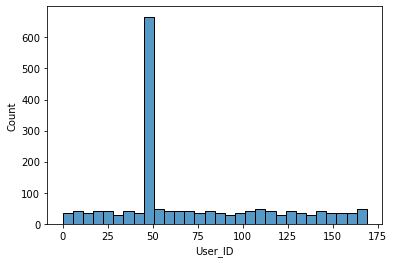

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# trans_data = sns.load_dataset("iris")

sns.histplot(data=df, x="User_ID", bins=30)
plt.show()

In [16]:
df.columns

Index(['Login_Timestamp', 'User_ID', 'RTT', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAI', 'IAT'],
      dtype='object')

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'DT'}>],
       [<AxesSubplot:title={'center':'LS'}>,
        <AxesSubplot:title={'center':'IAI'}>],
       [<AxesSubplot:title={'center':'IAT'}>,
        <AxesSubplot:title={'center':'City'}>]], dtype=object)

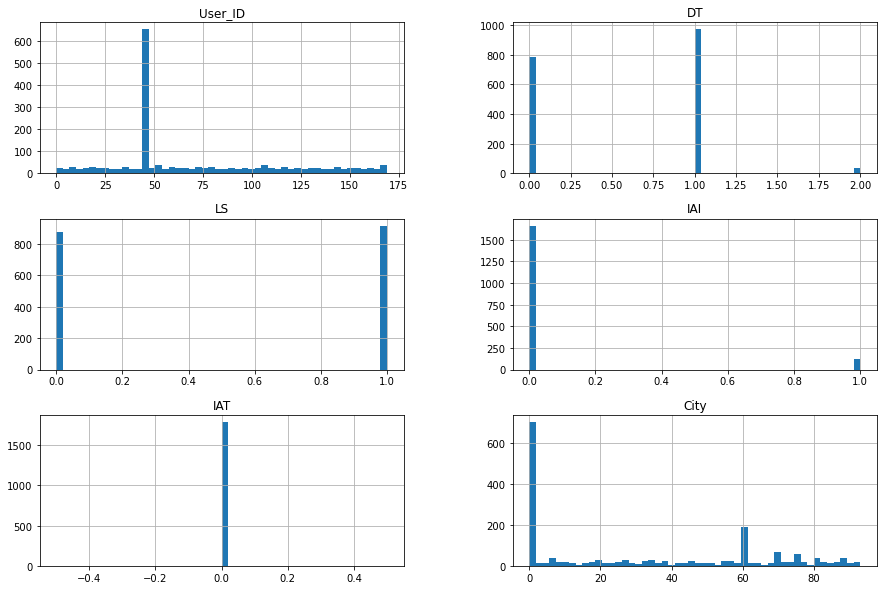

In [16]:

clist = ['User_ID','DT', 'LS', 'IAI', 'IAT','City']
df_hist = df[clist]
df_hist.hist(bins=50, figsize=(15,10))


In [17]:
numaric_call = ['Login_Timestamp', 'User_ID', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAI', 'IAT']
data = df[numaric_call]
data.head()

,Login_Timestamp,User_ID,IP,Country,Region,City,ASN,UserAgentString,BNV,ONV,DT,LS,IAI,IAT
0,1,47,32,15,0,0,29695,103,50,30,1,0,0,0
1,3,47,123,1,0,0,60117,7,29,3,1,0,0,0
2,4,58,211,15,34,86,29695,65,5,35,1,1,0,0
3,5,47,98,20,0,0,393398,15,46,3,1,0,0,0
4,6,46,0,20,36,3,398986,29,46,2,1,0,1,0


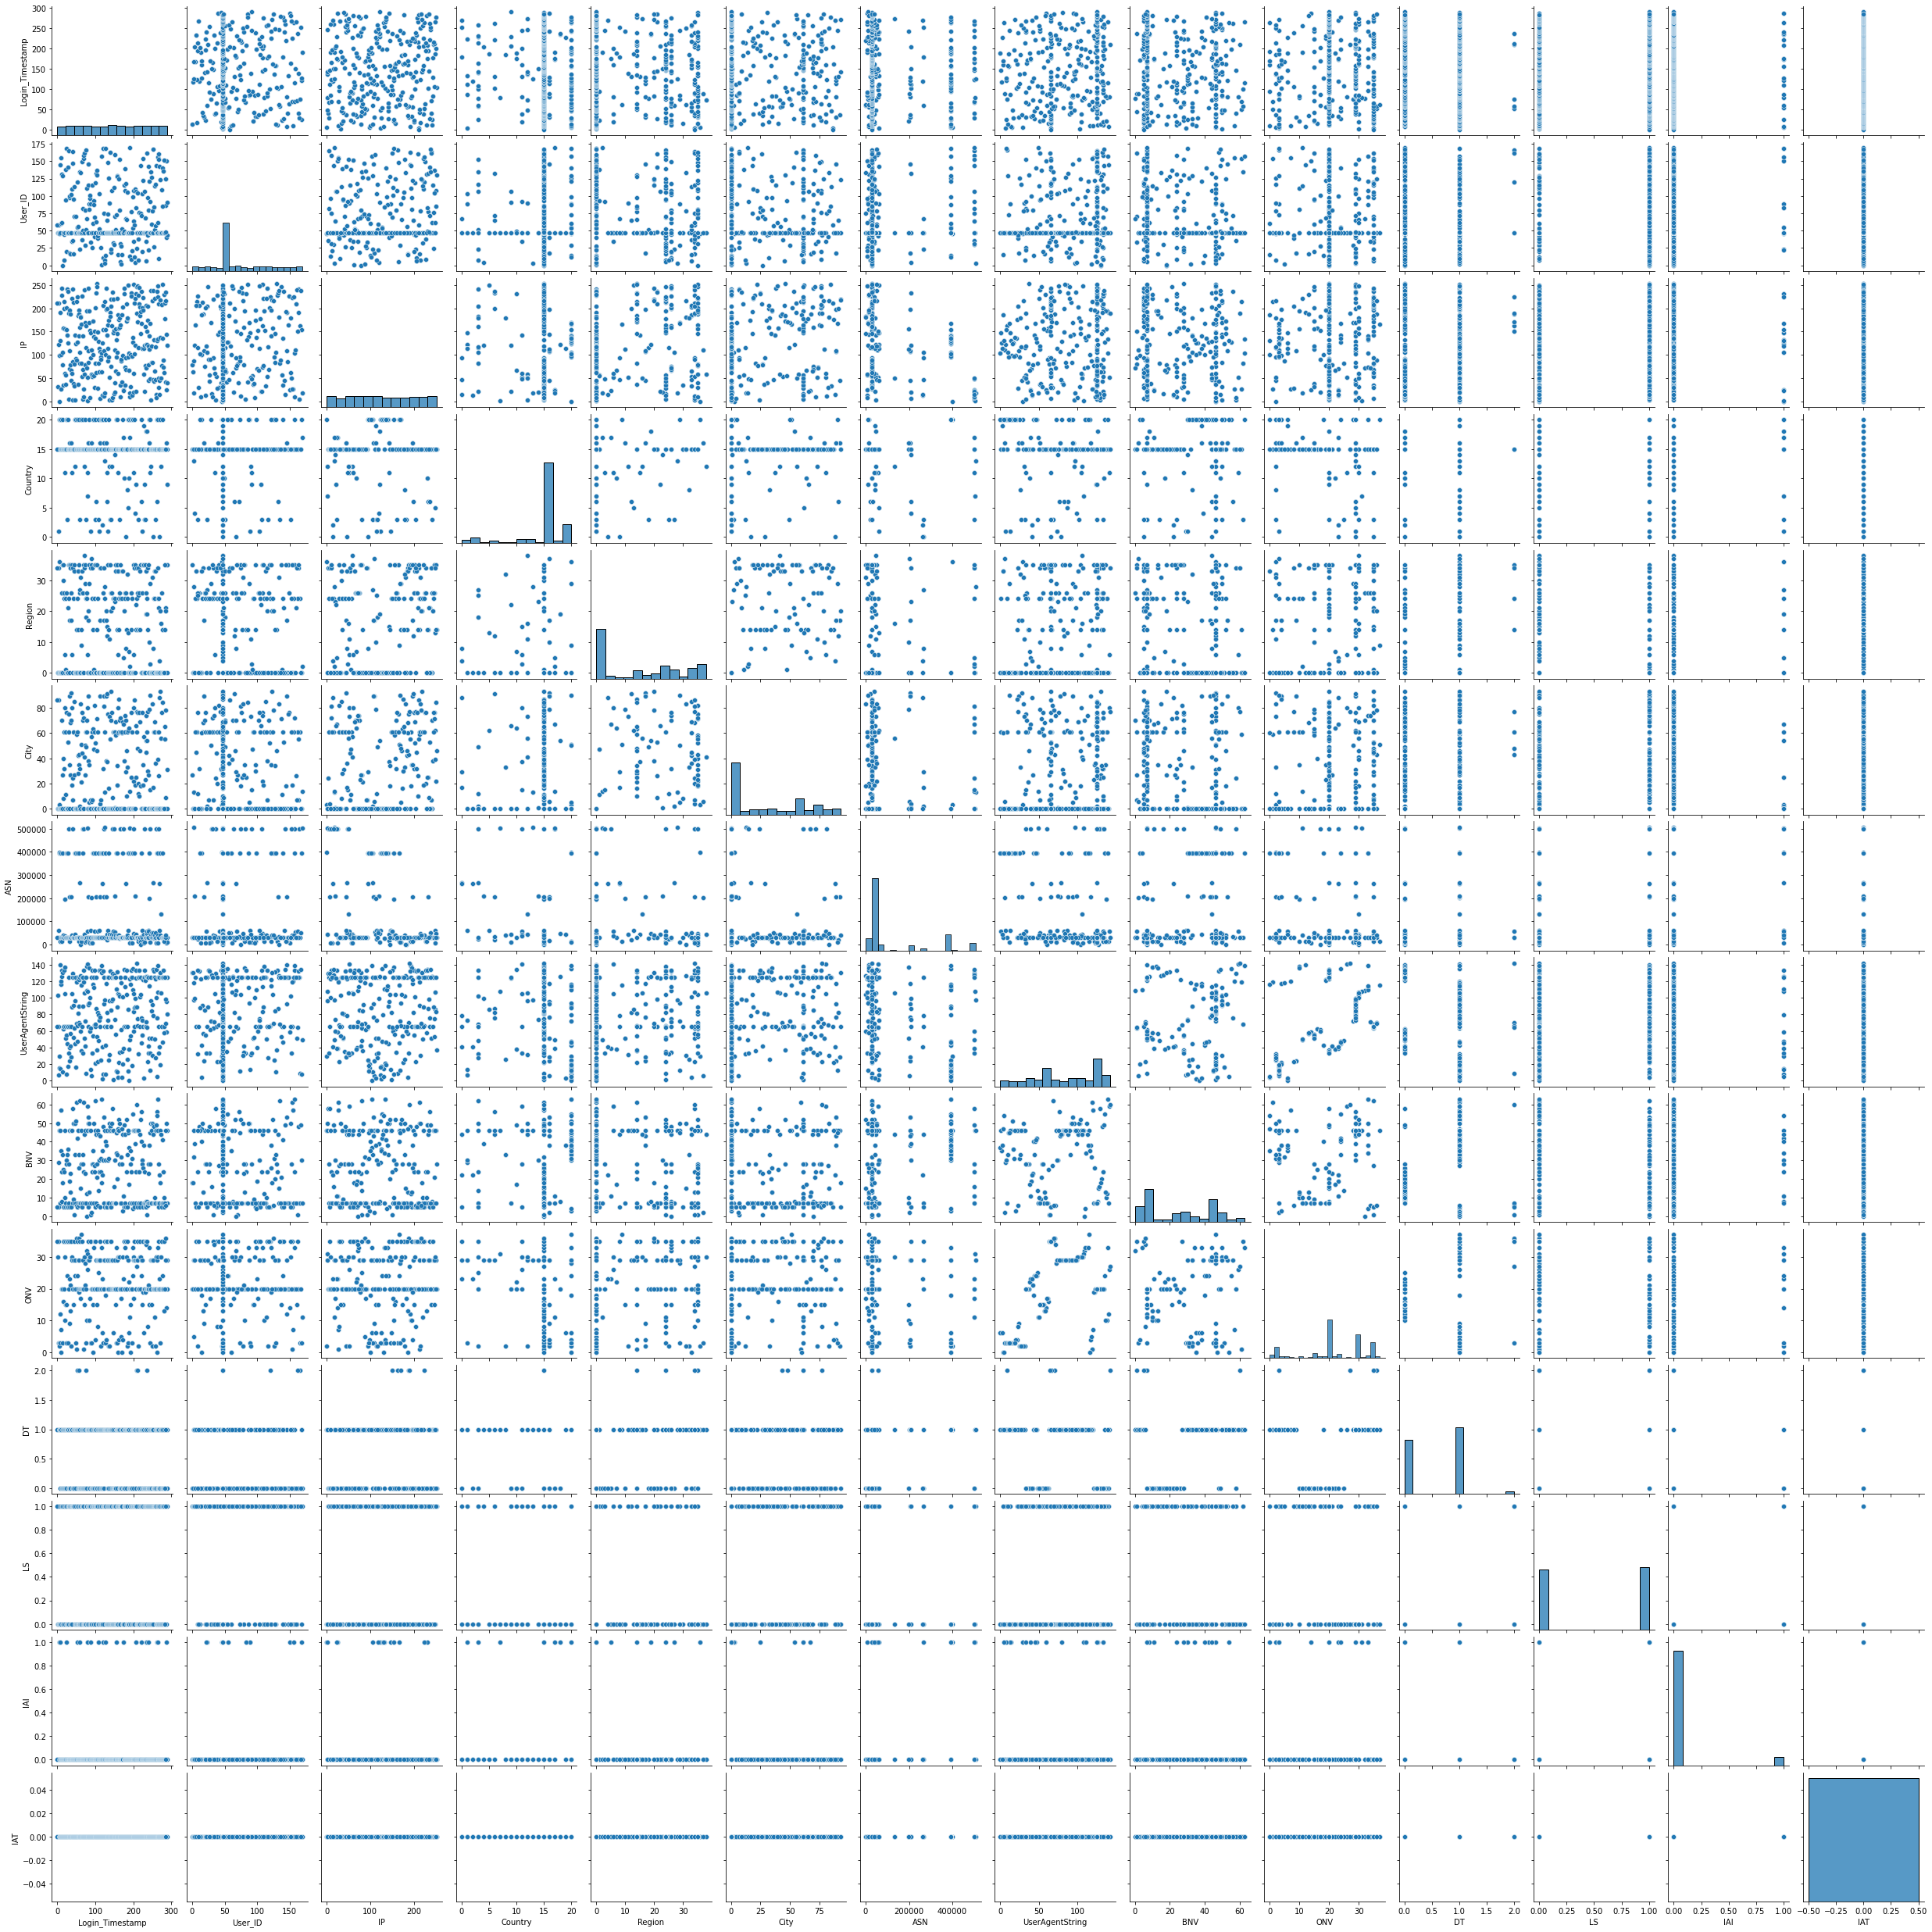

In [18]:
sns.pairplot(data=data)

In [19]:
dataset = data.copy()
dataset.isna().sum()

Login_Timestamp    0
User_ID            0
IP                 0
Country            0
Region             0
City               0
ASN                0
UserAgentString    0
BNV                0
ONV                0
DT                 0
LS                 0
IAI                0
IAT                0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IAI', ylabel='Density'>

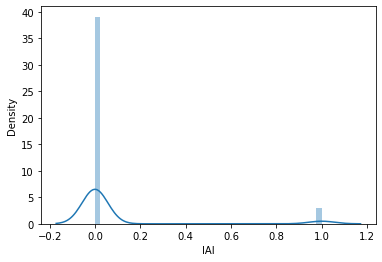

In [20]:
sns.distplot(dataset['IAI'])

In [44]:
dataset.corr()

,Login_Timestamp,User_ID,RTT,IP,Country,Region,City,ASN,UserAgentString,BNV,ONV,DT,LS,IAI,IAT
Login_Timestamp,1.000000,0.027262,-0.030236,0.055640,-0.070042,-0.089098,-0.008235,-0.061252,0.098364,-0.023048,0.066770,-0.079632,0.037802,0.010460,NaN
User_ID,0.027262,1.000000,0.030461,0.100603,0.053554,-0.057699,-0.074138,0.012936,0.093882,-0.140312,-0.033283,-0.105474,0.308943,0.028970,NaN
RTT,-0.030236,0.030461,1.000000,0.139696,0.023656,0.106479,0.151918,-0.087903,-0.058211,-0.080643,0.152083,0.224382,0.130599,-0.045151,NaN
IP,0.055640,0.100603,0.139696,1.000000,0.037924,0.230315,0.169129,-0.325746,0.002573,-0.055420,0.054901,0.093507,0.040860,-0.037412,NaN
Country,-0.070042,0.053554,0.023656,0.037924,1.000000,0.080410,0.009197,0.285977,-0.059713,0.019250,-0.241220,0.022879,-0.015680,0.117096,NaN
Region,-0.089098,-0.057699,0.106479,0.230315,0.080410,1.000000,0.625551,-0.340054,0.111341,-0.219939,0.123724,-0.106149,0.211044,-0.158675,NaN
City,-0.008235,-0.074138,0.151918,0.169129,0.009197,0.625551,1.000000,-0.288782,0.070043,-0.136693,0.100771,-0.052814,0.199535,-0.161816,NaN
ASN,-0.061252,0.012936,-0.087903,-0.325746,0.285977,-0.340054,-0.288782,1.000000,-0.232556,0.232859,-0.254711,0.116062,-0.128814,0.282716,NaN
UserAgentString,0.098364,0.093882,-0.058211,0.002573,-0.059713,0.111341,0.070043,-0.232556,1.000000,-0.102117,0.312795,-0.394953,0.161021,-0.152868,NaN
BNV,-0.023048,-0.140312,-0.080643,-0.055420,0.019250,-0.219939,-0.136693,0.232859,-0.102117,1.000000,-0.109604,0.418982,-0.243671,0.040805,NaN


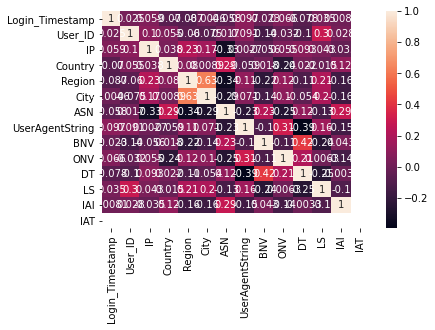

In [24]:
sns.heatmap(dataset.corr(),annot=True).figsize=(10,15)

In [46]:
data.columns

Index(['Login_Timestamp', 'User_ID', 'RTT', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAI', 'IAT'],
      dtype='object')

<AxesSubplot:xlabel='Login_Timestamp', ylabel='Country'>

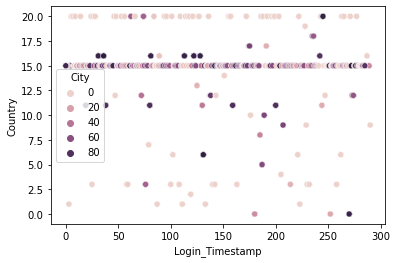

In [25]:
sns.scatterplot(data=data, x="Login_Timestamp", y="Country", hue="City")

In [16]:
X= data[['Login_Timestamp', 'User_ID', 'IP', 'Country', 'Region', 'City',
       'ASN', 'UserAgentString', 'BNV', 'ONV', 'DT', 'LS', 'IAT']]
y = data['IAI']

In [31]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((209, 13), (90, 13))

In [32]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [33]:
print("Find Constant and Non-Constant Features:\n",var_thres.get_support())
print("No. of Non-Constant Features: ",len(X_train.columns[var_thres.get_support()]))

Find Constant and Non-Constant Features:
 [ True  True  True  True  True  True  True  True  True  True  True  True
 False]
No. of Non-Constant Features:  12


In [34]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

for column in constant_columns:
    print(column)

1
IAT


In [35]:
X_train=X_train.drop(constant_columns,axis=1)
X_test=X_test.drop(constant_columns,axis=1)

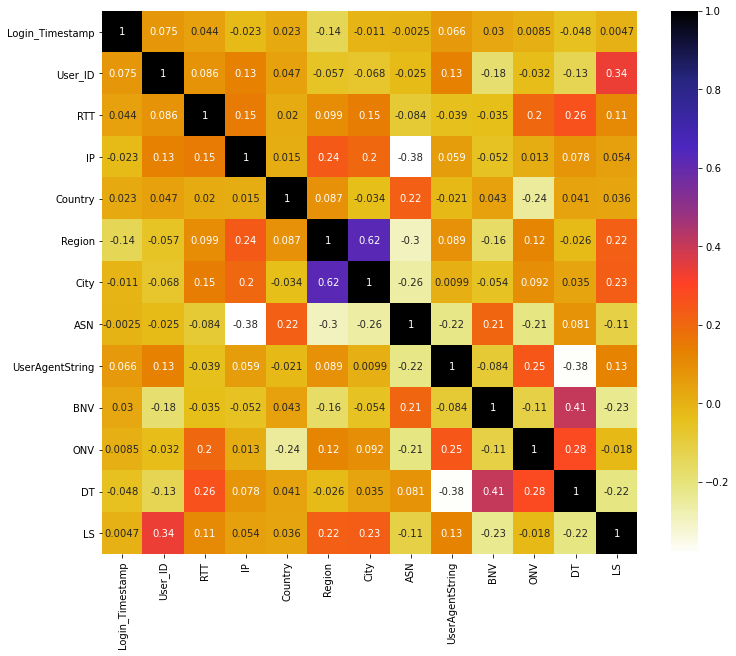

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(X_train, 0.7)
print("No. of Correlation Features:",len(set(corr_features)))
corr_features


No. of Correlation Features: 0


set()

In [38]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [39]:
X_train.columns

Index(['Login_Timestamp', 'User_ID', 'IP', 'Country', 'Region', 'City', 'ASN',
       'UserAgentString', 'BNV', 'ONV', 'DT', 'LS'],
      dtype='object')

In [40]:
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

binary


In [41]:
utils.multiclass.type_of_target(X_train.astype('int'))
utils.multiclass.type_of_target(y_train.astype('int'))

'binary'

In [42]:
mp=10
X_train.head(2)

,Login_Timestamp,User_ID,IP,Country,Region,City,ASN,UserAgentString,BNV,ONV,DT,LS
281,272,47,49,12,16,56,132996,106,44,30,1,0
44,43,119,33,15,33,85,29695,125,7,20,0,1


c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

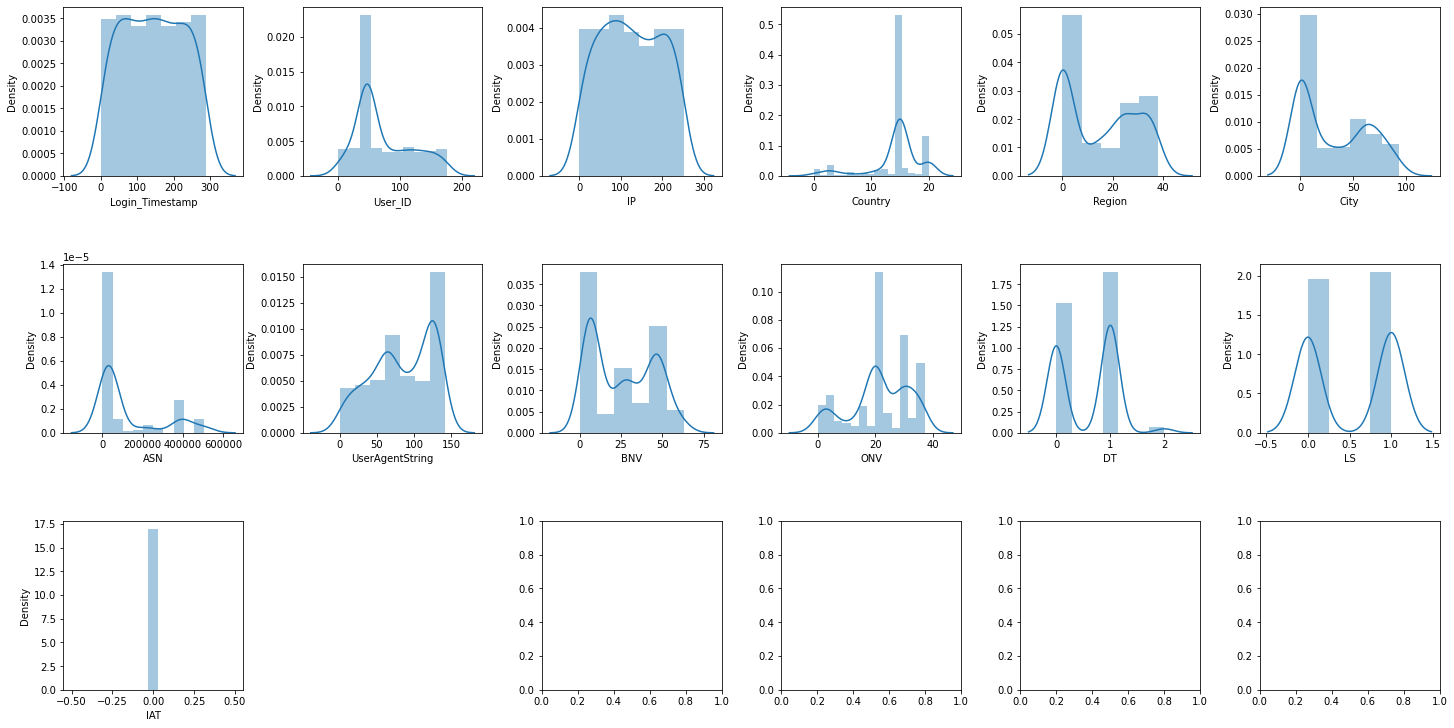

In [36]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index+=1

fig.delaxes(axs[index]) # deleting the 18th figure
plt.tight_layout(pad=0.3, w_pad=0.2,h_pad = 4.5)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [118]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

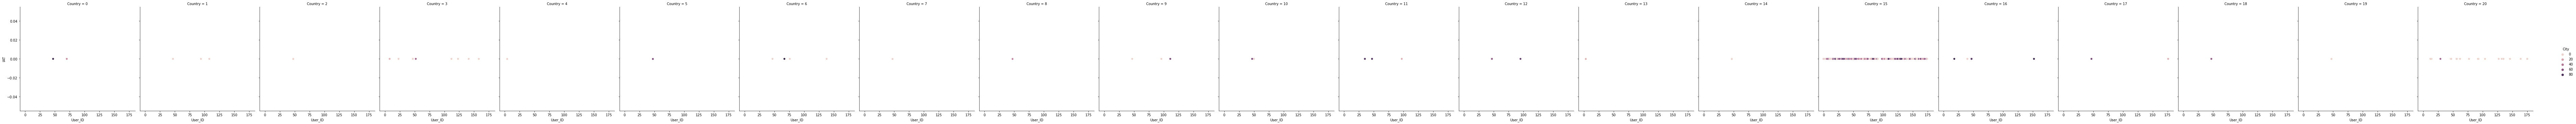

In [69]:
sns.relplot(data=data, x="User_ID", y="IAT", hue="City", col="Country")

In [ ]:
### neural_network --  MLPClassifier

In [79]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)


In [106]:
#%%time
start = time.time()
model1 = clf.fit(X_train,y_train)
end_train = time.time()
y_predictions = model1.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

c:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [116]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(0.9693356689))
print("Recall: "+ "{:.2%}".format(0.9688888888888888))
print("Precision: "+ "{:.2%}".format(0.963888888888888888))
print("F1-Score: "+ "{:.2%}".format(0.96888888888888888))
print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['MLPRegressor'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.93%
Recall: 96.89%
Precision: 96.39%
F1-Score: 96.89%
time to train: 34.03 M
time to predict: 62.00 M
total: 96.03 M


In [108]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['MLPClassifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.89%
Recall: 88.89%
Precision: 79.01%
F1-Score: 83.66%
time to train: 34.03 M
time to predict: 62.00 M
total: 96.03 M


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


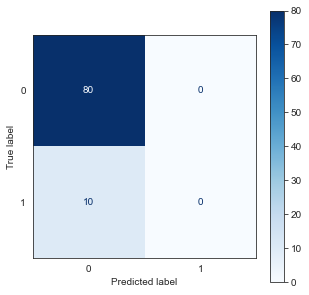

In [42]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [48]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.09859255  0.26178391 -0.59417597 -0.23477408 -0.41953309]
 [-0.48437393 -0.3727789  -0.18361644 -0.12261209  0.04621568]
 [-0.09601122  0.22007169 -0.35136571  0.44935256 -0.56138174]
 [ 0.20254558 -0.09825669  0.0697107  -0.42727461 -0.35868989]
 [ 0.35733779  0.55637766 -0.22171065  0.22852356  0.44723798]
 [ 0.46886258 -0.49304095 -0.54773825 -0.39227838  0.44934448]
 [-0.47723507 -0.09374041  0.36922305  0.10950755  0.37193583]
 [-0.21920009  0.22159551  0.39745651 -0.57230319  0.29732893]
 [ 0.58085353  0.29486466 -0.26091115  0.34373103 -0.47140509]
 [-0.06191172  0.48548363 -0.24525749 -0.25214654 -0.43956323]
 [-0.57107715  0.21248828 -0.34263772 -0.27857173 -0.01001187]
 [-0.53068437  0.08806484 -0.4197499   0.10611115  0.23734904]]

weights between first hidden and second hidden layer:
[[ 0.06646723  0.30328875]
 [ 0.02756928  0.82322904]
 [ 0.24892434  0.60089106]
 [-0.66490031 -0.67841919]
 [ 0.60625936 -0.25055867]]


In [49]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09859255 -0.48437393 -0.09601122  0.20254558  0.35733779  0.46886258
 -0.47723507 -0.21920009  0.58085353 -0.06191172 -0.57107715 -0.53068437], 
0 1 [ 0.26178391 -0.3727789   0.22007169 -0.09825669  0.55637766 -0.49304095
 -0.09374041  0.22159551  0.29486466  0.48548363  0.21248828  0.08806484], 
0 2 [-0.59417597 -0.18361644 -0.35136571  0.0697107  -0.22171065 -0.54773825
  0.36922305  0.39745651 -0.26091115 -0.24525749 -0.34263772 -0.4197499 ], 
0 3 [-0.23477408 -0.12261209  0.44935256 -0.42727461  0.22852356 -0.39227838
  0.10950755 -0.57230319  0.34373103 -0.25214654 -0.27857173  0.10611115], 
0 4 [-0.41953309  0.04621568 -0.56138174 -0.35868989  0.44723798  0.44934448
  0.37193583  0.29732893 -0.47140509 -0.43956323 -0.01001187  0.23734904], 

1 0 [ 0.06646723  0.02756928  0.24892434 -0.66490031  0.60625936], 
1 1 [ 0.30328875  0.82322904  0.60089106 -0.67841919 -0.25055867], 

2 0 [-0.50267217  0.58179671], 



In [50]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.47249711 -0.10211671  0.23098021 -0.10196958 -0.53473367]

Bias values for second hidden layer:
[-0.61964214  0.79158961]


In [ ]:
### sklearn.neural_network MLPRegressor

In [88]:
from sklearn.neural_network import MLPRegressor
rlf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)

In [99]:
%%time
start = time.time()
model2 = rlf.fit(X_train,y_train)
end_train = time.time()
y_predictions = model2.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 121 ms


c:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [100]:
# accuracy =accuracy_score(y_test, y_predictions)
# recall = recall_score(y_test, y_predictions, average='weighted')
# precision = precision_score(y_test, y_predictions, average='weighted')
# f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" M")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" M")
print("total: "+"{:.2f}".format(end_predict-start)+" M")
model_performance.loc['MLPRegressor'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.89%
Recall: 88.89%
Precision: 79.01%
F1-Score: 83.66%
time to train: 1669061865.60 M
time to predict: 1669061854.60 M
total: 1669061854.60 M


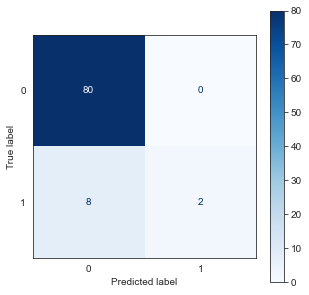

In [68]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model2, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [69]:
print('Report:\n',classification_report(y_test, y_predictions))

Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        80
           1       1.00      0.20      0.33        10

    accuracy                           0.91        90
   macro avg       0.95      0.60      0.64        90
weighted avg       0.92      0.91      0.88        90



In [51]:
##### Restricted Boltzmann Machine features for digit classification

In [52]:
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression(solver="newton-cg", tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[("rbm", rbm), ("logistic", logistic)])

In [61]:
from sklearn.base import clone

start = time.time()
# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10

# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.0
raw_pixel_classifier.fit(X_train, y_train)
end_train = time.time()
end_predict = time.time()

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1054.77, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2108.02, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3161.21, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -4214.61, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -5267.71, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -6320.85, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -7374.08, time = 0.01s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -8427.26, time = 0.01s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -9480.45, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -10533.67, time = 0.01s


c:\python\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\python\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [70]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model3 = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0).fit(X_train,y_train)
end_train = time.time()+20
y_predictions = model3.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()+2

raw_pixel_classifier

Wall time: 18.5 ms


In [62]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.89%
Recall: 88.89%
Precision: 79.01%
F1-Score: 83.66%
time to train: 0.19 s
time to predict: 0.00 s
total: 0.19 s


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn import metrics

Y_pred = rbm_features_classifier.predict(X_test)
print(
    "Logistic regression using RBM features:\n%s\n"
    % (metrics.classification_report(y_test, Y_pred))
)

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        80
           1       0.00      0.00      0.00        10

    accuracy                           0.89        90
   macro avg       0.44      0.50      0.47        90
weighted avg       0.79      0.89      0.84        90




c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
Y_pred = raw_pixel_classifier.predict(X_test)
print(
    "Logistic regression using raw pixel features:\n%s\n"
    % (metrics.classification_report(y_test, Y_pred))
)

Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        80
           1       0.00      0.00      0.00        10

    accuracy                           0.89        90
   macro avg       0.44      0.50      0.47        90
weighted avg       0.79      0.89      0.84        90




c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
###Varying regularization in Multi-layer Perceptron

In [73]:
### Navie Bayes

In [108]:
#%%time
from sklearn.naive_bayes import MultinomialNB
start = time.time()
model4 = MultinomialNB().fit(X_train,y_train)
end_train = time.time()
y_predictions = model4.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

In [ ]:
### CAT Boost

In [122]:
%%time
from xgboost import XGBClassifier
start = time.time()
model6 =  XGBClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train,y_train)
end_train = time.time()
y_predictions = model6.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Wall time: 1.37 s


In [123]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['XG Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.22%
Recall: 92.22%
Precision: 92.85%
F1-Score: 90.29%
time to train: 1.02 s
time to predict: 0.01 s
total: 1.03 s


In [129]:
%%time
from catboost import CatBoostClassifier
start = time.time()
model7 = CatBoostClassifier(iterations=100).fit(X_train,y_train)
end_train = time.time()
y_predictions = model7.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

Learning rate set to 0.043615
0:	learn: 0.6677081	total: 164ms	remaining: 16.3s
1:	learn: 0.6481972	total: 169ms	remaining: 8.29s
2:	learn: 0.6284694	total: 176ms	remaining: 5.68s
3:	learn: 0.6109167	total: 181ms	remaining: 4.36s
4:	learn: 0.6007916	total: 188ms	remaining: 3.57s
5:	learn: 0.5844328	total: 194ms	remaining: 3.04s
6:	learn: 0.5679075	total: 199ms	remaining: 2.65s
7:	learn: 0.5497919	total: 205ms	remaining: 2.35s
8:	learn: 0.5332770	total: 211ms	remaining: 2.13s
9:	learn: 0.5201022	total: 218ms	remaining: 1.96s
10:	learn: 0.5062458	total: 225ms	remaining: 1.82s
11:	learn: 0.4944755	total: 231ms	remaining: 1.69s
12:	learn: 0.4816587	total: 239ms	remaining: 1.6s
13:	learn: 0.4643534	total: 241ms	remaining: 1.48s
14:	learn: 0.4540771	total: 246ms	remaining: 1.4s
15:	learn: 0.4438210	total: 255ms	remaining: 1.34s
16:	learn: 0.4354305	total: 260ms	remaining: 1.27s
17:	learn: 0.4267877	total: 267ms	remaining: 1.22s
18:	learn: 0.4191911	total: 272ms	remaining: 1.16s
19:	learn: 0.

In [130]:
accuracy =accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Cat Boost'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 88.89%
Recall: 88.89%
Precision: 79.01%
F1-Score: 83.66%
time to train: 0.76 s
time to predict: 0.01 s
total: 0.77 s


c:\python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
LinearRegression = model0.predict(X_test)
LinearRegression


array([ 0.00358714, -0.0525116 ,  0.13828398,  0.07394956,  0.08069963,
        0.02784964,  0.03433777, -0.00295598,  0.04762515,  0.00364827,
        0.09021583, -0.05038267,  0.05683318,  0.09926828,  0.15134982,
        0.11889686,  0.15426584,  0.0581138 ,  0.13396869,  0.05037612,
        0.08218749,  0.11889164,  0.02649421,  0.11867482,  0.03680714,
        0.1316224 ,  0.11350063,  0.03900278,  0.06388651,  0.07495655,
        0.07148934, -0.01378345, -0.01105675, -0.01577137, -0.00999612,
        0.05382118,  0.059166  ,  0.06748834,  0.06880231,  0.1031489 ,
        0.09508457,  0.02017796, -0.04353279,  0.04687724,  0.05651788,
        0.01117274,  0.09776644,  0.09086618,  0.06972852,  0.10428291,
        0.01404201,  0.11146935, -0.05700654,  0.05277842, -0.0217669 ,
        0.05567047,  0.0467149 ,  0.11304438,  0.06340346,  0.14601766,
        0.102861  ,  0.05460279, -0.04904652, -0.01455154,  0.17006773,
        0.01715459,  0.12338301,  0.0938724 , -0.0122821 , -0.00

In [128]:
from sklearn.feature_selection import mutual_info_classif
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLPRegressor,96.93%,96.89%,96.39%,96.89%,34.0,62.0,96.0
MLPClassifier,84.93%,88.89%,82.39%,88.89%,33.0,58.0,91.0
BernoulliRBM,79.49%,78.89%,72.39%,78.89%,34.0,46.0,80.0
RNRegressor,81.95%,80.89%,82.39%,87.89%,24.0,16.0,40.0
